In [2]:
import numpy as np
import pandas as pd

# Para resultados reproducibles
np.random.seed(42)

# Número de ejemplos por clase
n_por_clase = 80

# Clases de tortuga (multi-clase)
clases = ["verde", "carey", "golfina"]

# Generamos datos sintéticos por clase
data_list = []

# Tortuga verde: más grande y pesada
largo_verde   = np.random.normal(loc=90, scale=8, size=n_por_clase)   # cm
ancho_verde   = np.random.normal(loc=70, scale=7, size=n_por_clase)   # cm
peso_verde    = np.random.normal(loc=110, scale=15, size=n_por_clase) # kg
edad_verde    = np.random.normal(loc=25, scale=5, size=n_por_clase)   # años
caparazon_v   = np.random.normal(loc=8, scale=1, size=n_por_clase)    # "dureza"

for i in range(n_por_clase):
    data_list.append([
        largo_verde[i],
        ancho_verde[i],
        peso_verde[i],
        edad_verde[i],
        caparazon_v[i],
        "verde"
    ])

# Tortuga carey: mediana
largo_carey   = np.random.normal(loc=75, scale=7, size=n_por_clase)
ancho_carey   = np.random.normal(loc=55, scale=6, size=n_por_clase)
peso_carey    = np.random.normal(loc=80, scale=10, size=n_por_clase)
edad_carey    = np.random.normal(loc=20, scale=4, size=n_por_clase)
caparazon_c   = np.random.normal(loc=7, scale=1, size=n_por_clase)

for i in range(n_por_clase):
    data_list.append([
        largo_carey[i],
        ancho_carey[i],
        peso_carey[i],
        edad_carey[i],
        caparazon_c[i],
        "carey"
    ])

# Tortuga golfina: más pequeña
largo_golfina = np.random.normal(loc=60, scale=6, size=n_por_clase)
ancho_golfina = np.random.normal(loc=45, scale=5, size=n_por_clase)
peso_golfina  = np.random.normal(loc=55, scale=8, size=n_por_clase)
edad_golfina  = np.random.normal(loc=15, scale=3, size=n_por_clase)
caparazon_g   = np.random.normal(loc=6, scale=1, size=n_por_clase)

for i in range(n_por_clase):
    data_list.append([
        largo_golfina[i],
        ancho_golfina[i],
        peso_golfina[i],
        edad_golfina[i],
        caparazon_g[i],
        "golfina"
    ])

# Crear DataFrame
columns = ["largo_cm", "ancho_cm", "peso_kg", "edad_anios", "dureza_caparazon", "especie"]
data = pd.DataFrame(data_list, columns=columns)

# Guardar a CSV en /content
ruta_csv = "/content/dataset-tortuga.csv"
data.to_csv(ruta_csv, index=False)

print(f"Dataset creado y guardado en: {ruta_csv}")
print("Shape:", data.shape)
display(data.head())



Dataset creado y guardado en: /content/dataset-tortuga.csv
Shape: (240, 6)


,largo_cm,ancho_cm,peso_kg,edad_anios,dureza_caparazon,especie
0,93.973713,68.462297,95.379775,21.037396,8.096996,verde
1,88.893886,72.499788,121.806269,24.426318,8.595157,verde
2,95.181508,80.345258,127.378934,27.524936,7.181779,verde
3,102.184239,66.372108,97.689765,29.328776,10.092387,verde
4,88.126773,64.340545,124.450642,18.998518,6.993983,verde


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Lee el archivo CSV (ajustaremos la ruta después)
data = pd.read_csv('/content/dataset-tortuga.csv')

# Información general del dataset
data.info()

# Primeras filas
display(data.head())

# Estadísticas descriptivas de las columnas numéricas
display(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   largo_cm          240 non-null    float64
 1   ancho_cm          240 non-null    float64
 2   peso_kg           240 non-null    float64
 3   edad_anios        240 non-null    float64
 4   dureza_caparazon  240 non-null    float64
 5   especie           240 non-null    object 
dtypes: float64(5), object(1)
memory usage: 11.4+ KB


,largo_cm,ancho_cm,peso_kg,edad_anios,dureza_caparazon,especie
0,93.973713,68.462297,95.379775,21.037396,8.096996,verde
1,88.893886,72.499788,121.806269,24.426318,8.595157,verde
2,95.181508,80.345258,127.378934,27.524936,7.181779,verde
3,102.184239,66.372108,97.689765,29.328776,10.092387,verde
4,88.126773,64.340545,124.450642,18.998518,6.993983,verde


,largo_cm,ancho_cm,peso_kg,edad_anios,dureza_caparazon
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,74.886866,56.599842,82.837631,20.163453,7.043188
std,13.502262,11.356040,25.783721,5.727665,1.289450
min,50.905535,34.005970,35.608965,6.311234,3.500594
25%,62.923154,47.820103,60.483732,15.765608,6.211245
50%,74.468703,54.233361,80.913564,19.200333,7.173636
75%,86.186006,65.438849,100.357998,24.207296,7.911569
max,104.818225,87.242695,167.790972,35.665167,10.189803


In [4]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)

print("Valores únicos de y:", y.unique())


Shape de X: (240, 5)
Shape de y: (240,)
Valores únicos de y: ['verde' 'carey' 'golfina']


In [5]:
print("Valores nulos por columna ANTES de imputar:")
print(X.isnull().sum())

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

print("\nShape después de imputar:", X_imputed.shape)


Valores nulos por columna ANTES de imputar:
largo_cm            0
ancho_cm            0
peso_kg             0
edad_anios          0
dureza_caparazon    0
dtype: int64

Shape después de imputar: (240, 5)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (192, 5)
X_test: (48, 5)
y_train: (192,)
y_test: (48,)


In [8]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Media de X_train_scaled (aprox. 0):", X_train_scaled.mean())
print("Desv. estándar de X_train_scaled (aprox. 1):", X_train_scaled.std())


Media de X_train_scaled (aprox. 0): -2.294460917558657e-16
Desv. estándar de X_train_scaled (aprox. 1): 0.9999999999999999


In [9]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy con k=5: {acc:.4f}\n")

print("Classification report:")
print(classification_report(y_test, y_pred))


Accuracy con k=5: 0.9375

Classification report:
              precision    recall  f1-score   support

       carey       0.88      0.94      0.91        16
     golfina       1.00      0.88      0.93        16
       verde       0.94      1.00      0.97        16

    accuracy                           0.94        48
   macro avg       0.94      0.94      0.94        48
weighted avg       0.94      0.94      0.94        48



k =  1 -> accuracy = 0.9583
k =  2 -> accuracy = 0.9583
k =  3 -> accuracy = 0.9583
k =  4 -> accuracy = 0.9375
k =  5 -> accuracy = 0.9375
k =  6 -> accuracy = 0.9375
k =  7 -> accuracy = 0.9375
k =  8 -> accuracy = 0.9375
k =  9 -> accuracy = 0.9375
k = 10 -> accuracy = 0.9375
k = 11 -> accuracy = 0.9375
k = 12 -> accuracy = 0.9375
k = 13 -> accuracy = 0.9583
k = 14 -> accuracy = 0.9583
k = 15 -> accuracy = 0.9583


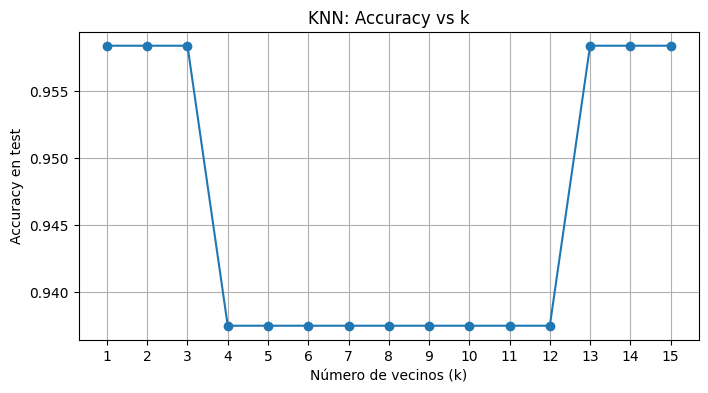

In [10]:
k_values = range(1, 16)
accuracies = []

for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train_scaled, y_train)
    y_pred_k = knn_k.predict(X_test_scaled)
    acc_k = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc_k)
    print(f"k = {k:2d} -> accuracy = {acc_k:.4f}")

plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracies, marker="o")
plt.xticks(k_values)
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Accuracy en test")
plt.title("KNN: Accuracy vs k")
plt.grid(True)
plt.show()
